In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
from scipy import stats

In [ ]:
from datetime import datetime
from sklearn import model_selection
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DSMarket/df_final_PK")


#DATA UNDERSTANDING

In [ ]:
df.info(verbose=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 12 entries, id to Revenue
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 2.8+ MB


In [ ]:
df.head()


,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.7414,2013-07-15,7644.8400
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,493,2011-25,5.2801,2011-06-20,2603.0893
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,288,2014-05,3.9501,2014-02-03,1137.6288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,3288,2011-10,5.7722,2011-03-07,18978.9936
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,1849,2011-21,3.9634,2011-05-23,7328.3266


In [ ]:
df.describe(include =np.number).T


,count,mean,std,min,25%,50%,75%,max
sales_total,30490.0,2154.654280,5217.226438,10.00,355.0000,848.00000,2031.750,250502.0000
sell_price,30490.0,5.494923,4.521271,0.12,2.5004,4.00800,7.150,39.8601
Revenue,30490.0,7465.859675,13802.033887,18.62,1713.3864,3738.60625,7957.695,530638.9200


In [ ]:
df.describe(exclude= np.number).T


,count,unique,top,freq,mean,min,25%,50%,75%,max
id,30490,30490,ACCESORIES_1_001_NYC_1,1,NaT,NaT,NaT,NaT,NaT,NaT
item,30490,3049,ACCESORIES_1_001,10,NaT,NaT,NaT,NaT,NaT,NaT
category,30490,3,SUPERMARKET,14370,NaT,NaT,NaT,NaT,NaT,NaT
department,30490,7,SUPERMARKET_3,8230,NaT,NaT,NaT,NaT,NaT,NaT
store,30490,10,Greenwich_Village,3049,NaT,NaT,NaT,NaT,NaT,NaT
store_code,30490,10,NYC_1,3049,NaT,NaT,NaT,NaT,NaT,NaT
region,30490,3,New York,12196,NaT,NaT,NaT,NaT,NaT,NaT
yearweek,30490,259,2011-05,10932,NaT,NaT,NaT,NaT,NaT,NaT
date,30490,NaN,NaN,NaN,2012-03-09 09:24:03.069858816,2011-01-31,2011-01-31,2011-07-04,2013-03-04,2016-02-15


In [ ]:
del(df["id"])


In [ ]:
df[df.duplicated()]


,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue


In [ ]:
df.isnull().sum()


item           0
category       0
department     0
store          0
store_code     0
region         0
sales_total    0
yearweek       0
sell_price     0
date           0
Revenue        0
dtype: int64

In [ ]:
df['yearweek'] = df['yearweek'].apply(lambda x: x.replace('-', ''))


In [ ]:
df['yearweek'].value_counts()

yearweek
201105    10932
201106     1043
201107      544
201110      301
201108      280
          ...  
201546        1
201532        1
201602        1
201548        1
201526        1
Name: count, Length: 259, dtype: int64

In [ ]:
df['yearweek'] = df['yearweek'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   item         30490 non-null  object        
 1   category     30490 non-null  object        
 2   department   30490 non-null  object        
 3   store        30490 non-null  object        
 4   store_code   30490 non-null  object        
 5   region       30490 non-null  object        
 6   sales_total  30490 non-null  int64         
 7   yearweek     30490 non-null  int64         
 8   sell_price   30490 non-null  float64       
 9   date         30490 non-null  datetime64[ns]
 10  Revenue      30490 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 2.6+ MB


###Analisi del Target


In [ ]:
TARGET ='sales_total'


In [ ]:
df[TARGET].describe()


count     30490.000000
mean       2154.654280
std        5217.226438
min          10.000000
25%         355.000000
50%         848.000000
75%        2031.750000
max      250502.000000
Name: sales_total, dtype: float64

In [ ]:
df[TARGET].isnull().sum()

0

<Figure size 1500x500 with 0 Axes>

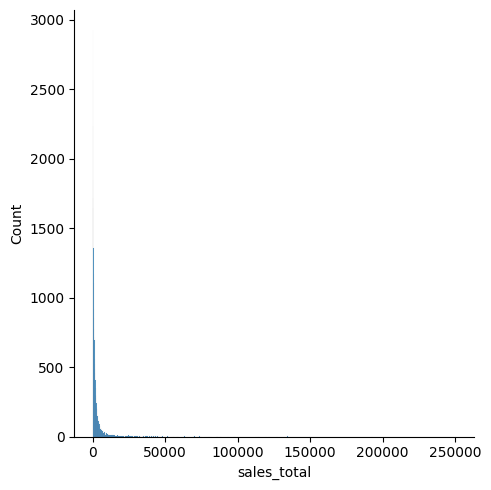

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(df[TARGET])

In [ ]:
##aplicar transformacion al TARGET, logaritmica, para normalizar el TARGET
#1. Traer los outliers para dentro
#2. sera mas facil comparar con otras variables

In [ ]:
df['sales_totalLOG'] = df[TARGET].apply(lambda x: np.log1p(x))


In [ ]:
TARGET_LOG = 'sales_totalLOG'


<Figure size 1500x500 with 0 Axes>

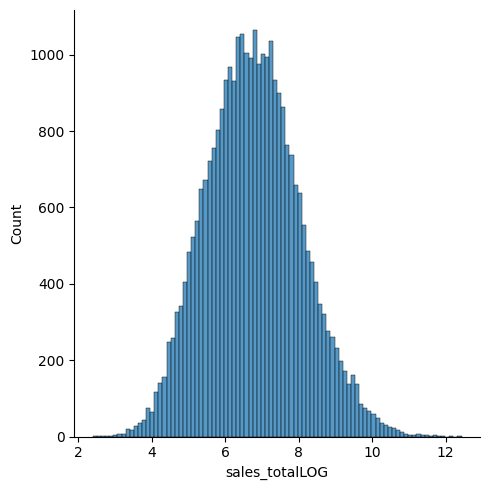

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(df[TARGET_LOG])

In [ ]:
def plot_cat_values(dataframe, column, target_col):
  plt.figure(figsize=(15,5))
  ax1=plt.subplot(2,1,1)

  ax1=sns.countplot(data= dataframe,
                    x = column,
                    order=list(dataframe[column].unique()))

  ax2=plt.subplot(2,1,2)
  ax2=sns.boxplot(data= dataframe[dataframe[target_col]>0],
              x = column,
              y= target_col,
              order= list(dataframe[column].unique()))
  plt.show()

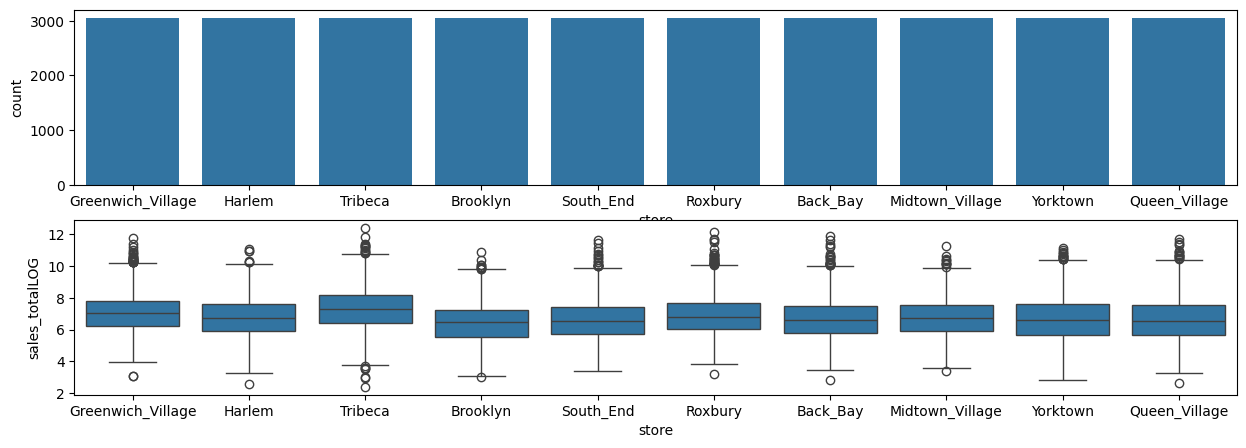

In [ ]:
plot_cat_values(df, 'store', TARGET_LOG)


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


Nuevas variables

In [ ]:
most_important_item = df.groupby(['item'])['sales_total'].size().sort_values().tail(15).index.tolist()


In [ ]:
df['top_items']=df['item'].isin(most_important_item)


In [ ]:
df['top_items'].value_counts()

top_items
False    30340
True       150
Name: count, dtype: int64

In [ ]:
less_important_items = df.groupby(['item'])['sales_total'].size().sort_values().head(15).index.tolist()
df['less_items']=df['item'].isin(less_important_items)


In [ ]:
df['less_items'].value_counts()

less_items
False    30340
True       150
Name: count, dtype: int64

In [ ]:
df["sell_price_evolution"] = df.groupby(['item', 'date'])['sell_price'].transform(np.mean)


In [ ]:
df['last_purchase_date'] = df['date'].max()
df['last_purchase_date'] = df['last_purchase_date'].astype(np.int64)

In [ ]:
df['date']= df['date'].astype(np.int64)

In [ ]:
df['time_since_last_purchase'] =\
df['last_purchase_date'] - df['date']

In [ ]:
most_important_store = df.groupby(['store'])['sales_total'].size().sort_values().tail(3).index.tolist()


In [ ]:
df['top_store']=df['store'].isin(most_important_store)


In [ ]:
df['top_store'].value_counts()

top_store
False    21343
True      9147
Name: count, dtype: int64

In [ ]:
less_important_store = df.groupby(['store'])['sales_total'].size().sort_values().head(3).index.tolist()
df['less_store']=df['store'].isin(less_important_store)


In [ ]:
df.set_index('item', inplace = True)


In [ ]:
df.drop('date', axis = 1, inplace = True)


In [ ]:
corr=df.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap="coolwarm")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,sales_total,yearweek,sell_price,Revenue,sales_totalLOG,year,month,top_items,less_items,sell_price_evolution,last_purchase_date,time_since_last_purchase,top_store,less_store
sales_total,1.000000,-0.176207,-0.185427,0.721266,0.596322,-0.171475,-0.121891,0.013659,-0.011828,-0.185427,nan,0.178776,0.049645,-0.024932
yearweek,-0.176207,1.000000,0.046001,-0.194083,-0.401074,0.994865,0.464873,0.017306,0.030177,0.046045,nan,-0.996432,-0.020229,-0.015022
sell_price,-0.185427,0.046001,1.000000,0.124018,-0.320781,0.044905,0.034437,-0.013153,0.006372,0.999035,nan,-0.046448,0.002567,-0.000108
Revenue,0.721266,-0.194083,0.124018,1.000000,0.548348,-0.189787,-0.123130,0.002300,-0.011403,0.123942,nan,0.196182,0.058142,-0.022949
sales_totalLOG,0.596322,-0.401074,-0.320781,0.548348,1.000000,-0.395547,-0.225095,0.023066,-0.012552,-0.320383,nan,0.402483,0.043382,-0.032254
year,-0.171475,0.994865,0.044905,-0.189787,-0.395547,1.000000,0.373397,0.015690,0.028661,0.044948,nan,-0.982778,-0.019535,-0.012333
month,-0.121891,0.464873,0.034437,-0.123130,-0.225095,0.373397,1.000000,0.020655,0.024738,0.034471,nan,-0.537491,-0.013114,-0.027586
top_items,0.013659,0.017306,-0.013153,0.002300,0.023066,0.015690,0.020655,1.000000,-0.004944,-0.013166,nan,-0.018495,-0.000000,-0.000000
less_items,-0.011828,0.030177,0.006372,-0.011403,-0.012552,0.028661,0.024738,-0.004944,1.000000,0.006378,nan,-0.031179,0.000000,0.000000
sell_price_evolution,-0.185427,0.046045,0.999035,0.123942,-0.320383,0.044948,0.034471,-0.013166,0.006378,1.000000,nan,-0.046493,0.000596,-0.001017


In [ ]:
#eliminamos las variables 'yearweek' y 'sell_price' por estar muy correlacionadas con . Tb se elimina last_purchase_date y time_since_last_purchase

In [ ]:
df.drop(['yearweek', 'sell_price', 'last_purchase_date', 'time_since_last_purchase'], axis = 1, inplace = True)


## Data Preparation


In [ ]:
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [ ]:
ohe_list=['category', 'department', 'store', 'store_code', 'region']

In [ ]:
for column in ohe_list:
  df = OHE(df, column)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30490 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sales_total                 30490 non-null  int64  
 1   Revenue                     30490 non-null  float64
 2   sales_totalLOG              30490 non-null  float64
 3   year                        30490 non-null  int32  
 4   month                       30490 non-null  int32  
 5   top_items                   30490 non-null  bool   
 6   less_items                  30490 non-null  bool   
 7   sell_price_evolution        30490 non-null  float64
 8   top_store                   30490 non-null  bool   
 9   less_store                  30490 non-null  bool   
 10  category_ACCESORIES         30490 non-null  bool   
 11  category_HOME_&_GARDEN      30490 non-null  bool   
 12  category_SUPERMARKET        30490 non-null  bool   
 13  departmen

## Modelling


In [ ]:
target_linked_features = ['Revenue', 'sales_total']


In [ ]:
df.drop(target_linked_features, axis = 1 , inplace = True)


In [ ]:
variables_numericas = df.select_dtypes(include='number')


In [ ]:
df.pivot_table(index=['year','month'], values= TARGET_LOG, aggfunc = [len, np.mean])


len           mean
           sales_totalLOG sales_totalLOG
year month                              
2011 1              10932       7.362795
     2               2101       6.574475
     3                920       6.760161
     4                650       6.860634
     5                407       6.871575
...                   ...            ...
2015 10                29       4.842764
     11                13       4.413725
     12                11       4.213700
2016 1                  5       4.436859
     2                 11       4.232607

[62 rows x 2 columns]

\#nos quedamos desde enero de 2013 puesto que las ventas han ido decreciendo en los últimos años

In [ ]:
df_val = df[df['year']*100 + df['month'] >= 201300]
df_dev = df[df['year']*100 + df['month'] < 201300]

## Fiting y evaluacion


In [ ]:
df_dev_X = df_dev.drop(TARGET_LOG, axis = 1)
df_val_X = df_val.drop(TARGET_LOG, axis = 1)

df_dev_y = df_dev[[TARGET_LOG]]
df_val_y = df_val[[TARGET_LOG]]

In [ ]:
df_dev_X.shape


(21894, 40)

In [ ]:
model_selection.train_test_split??


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = model_selection.train_test_split(df_dev_X, df_dev_y, test_size=0.3, random_state=42)

In [ ]:
model1_rf = RandomForestRegressor(n_estimators= 50, max_depth = 3, random_state = 42)

In [ ]:
model1_rf.fit(X_train_1,y_train_1)

<ipython-input-63-1ee327960a8f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1_rf.fit(X_train_1,y_train_1)


RandomForestRegressor(max_depth=3, n_estimators=50, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
tree1 = export_graphviz(
    decision_tree = model1_rf[1],
    feature_names = X_train_1.columns
)

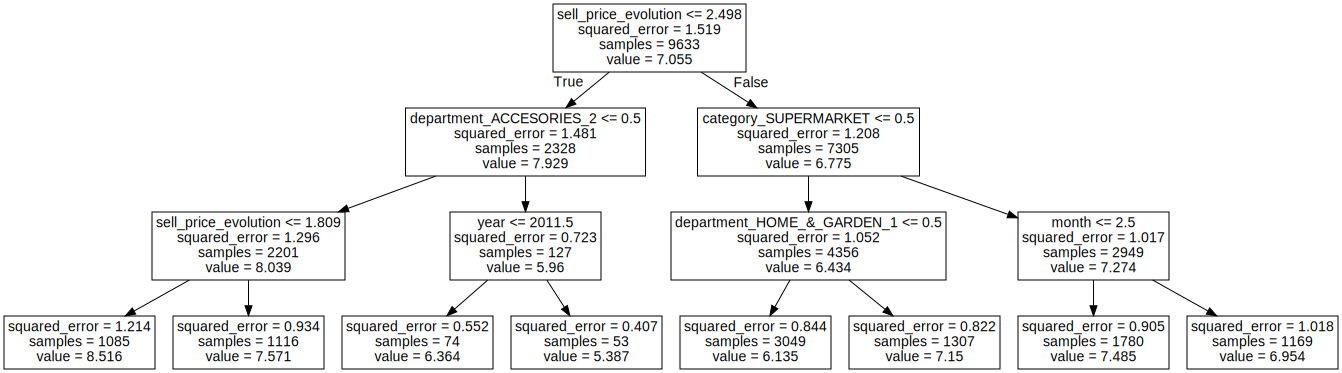

In [ ]:
import graphviz
graphviz.Source(tree1)

In [ ]:
#feature importance

In [ ]:
top_features = pd.Series(model1_rf.feature_importances_, index = X_train_1.columns).sort_values(ascending = False).head(15)


In [ ]:
top_features


sell_price_evolution          0.488439
category_SUPERMARKET          0.217102
department_HOME_&_GARDEN_1    0.156331
department_ACCESORIES_2       0.082044
month                         0.023079
department_HOME_&_GARDEN_2    0.013813
category_ACCESORIES           0.011585
year                          0.006748
department_SUPERMARKET_3      0.000488
region_New York               0.000372
store_code_PHI_1              0.000000
store_code_PHI_2              0.000000
store_code_NYC_4              0.000000
store_code_PHI_3              0.000000
store_South_End               0.000000
dtype: float64

In [ ]:
predictions_rf1 = model1_rf.predict(X_test_1)

In [ ]:
test_predictions_rf1 = pd.DataFrame(predictions_rf1, columns = ['Prediction-RF'], index = X_test_1.index)

In [ ]:
results_df_rf1 = y_test_1.copy()

In [ ]:
results_df_rf1.columns = ['Target']

In [ ]:
results_df_rf1 = results_df_rf1.join(test_predictions_rf1)

In [ ]:
results_df_rf1.head(10)

,Target,Prediction-RF
item,,
ACCESORIES_1_002,6.496775,6.131473
ACCESORIES_1_002,6.496775,6.131473
ACCESORIES_1_002,6.496775,6.131473
ACCESORIES_1_002,6.202536,6.131473
ACCESORIES_1_002,6.202536,6.131473
ACCESORIES_1_002,6.202536,6.131473
ACCESORIES_1_002,7.042286,6.131473
ACCESORIES_1_002,7.042286,6.131473
ACCESORIES_1_002,7.042286,6.131473


In [ ]:
results_df_rf1.sort_values(by= 'Target', ascending = False).head(20)


,Target,Prediction-RF
item,,
SUPERMARKET_3_090,12.431226,8.560694
SUPERMARKET_3_090,12.431226,8.560694
SUPERMARKET_3_090,12.431226,8.560694
SUPERMARKET_3_090,11.691047,8.560694
SUPERMARKET_3_090,11.691047,8.560694
SUPERMARKET_3_090,11.691047,8.560694
SUPERMARKET_3_586,11.630308,8.560694
SUPERMARKET_3_586,11.630308,8.560694
SUPERMARKET_3_226,11.495047,8.560694


In [ ]:
# Las predicciones son un poco bajas necesita reajustes

In [ ]:
results_df_rf1['error-RF'] = results_df_rf1['Target'] - results_df_rf1['Prediction-RF']

In [ ]:
results_df_rf1['squared_error-RF'] = results_df_rf1['error-RF']**2

In [ ]:
results_df_rf1['root_squared_error-RF'] = np.sqrt(results_df_rf1['squared_error-RF'])

In [ ]:
results_df_rf1['squared_error-RF'].mean()

0.8709502483230471

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test_1,predictions_rf1)

0.8647459801348144

In [ ]:
#referencias:

#benchmark: modelo tonto _>

In [ ]:
(results_df_rf1['Target']**2).mean()

51.470306160767414

In [ ]:
results_df_rf1.sort_values(by= 'Target', ascending = False).head(5)


,Target,Prediction-RF,error-RF,squared_error-RF,root_squared_error-RF
item,,,,,
SUPERMARKET_3_090,12.431226,8.560694,3.870532,14.981016,3.870532
SUPERMARKET_3_090,12.431226,8.560694,3.870532,14.981016,3.870532
SUPERMARKET_3_090,12.431226,8.560694,3.870532,14.981016,3.870532
SUPERMARKET_3_090,11.691047,8.560694,3.130352,9.799104,3.130352
SUPERMARKET_3_090,11.691047,8.560694,3.130352,9.799104,3.130352


<Axes: xlabel='root_squared_error-RF', ylabel='Count'>

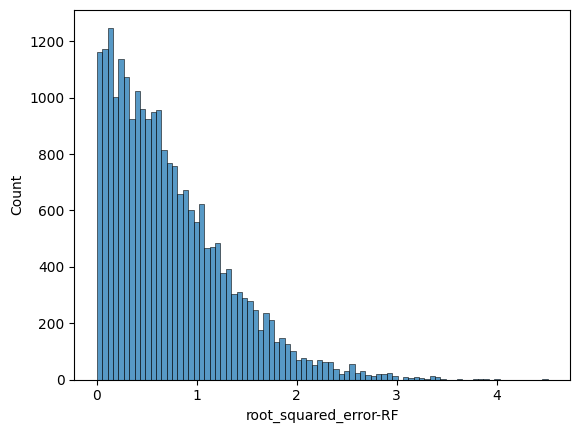

In [ ]:
#distribucion del error

sns.histplot(data = results_df_rf1[results_df_rf1['Target']>0], x= 'root_squared_error-RF')


<Axes: xlabel='Target', ylabel='Count'>

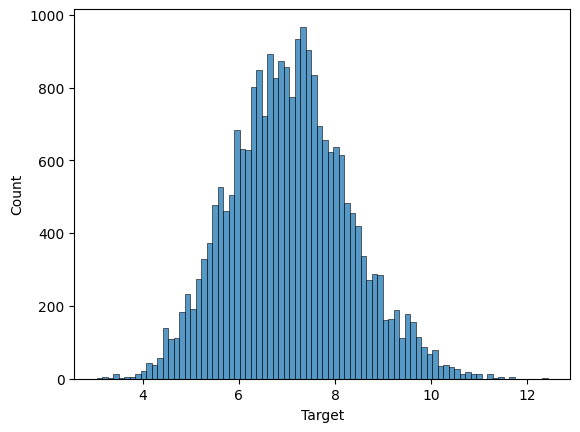

In [ ]:
#distribucion del target
sns.histplot(data = results_df_rf1[results_df_rf1['Target']>0], x= 'Target')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
models_to_train = [

    ('Random Forest depth3', RandomForestRegressor(n_estimators = 70, max_depth = 6, random_state = 42)),
    ('DecissionTree', DecisionTreeRegressor(max_depth = 6, random_state = 42)),
    ('GradienBoosting-n_estimators80', xgb.XGBRegressor(n_estimators = 80,max_depth = 4, random_state = 42)),
    ('Linear Regression', LinearRegression())]

In [ ]:
def AutoModelling(dev_Dataframe, val_Dataframe, target_var,test_size_prop, models):

  dev_Dataframe_X = dev_Dataframe.drop(target_var, axis = 1)
  val_Dataframe_X = val_Dataframe.drop(target_var, axis = 1)
  dev_Dataframe_y = dev_Dataframe[[target_var]]
  val_Dataframe_y = val_Dataframe[[target_var]]

  X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_Dataframe_X, dev_Dataframe_y, test_size=test_size_prop, random_state=42)
  results_df = y_test.copy()
  results_df.columns = ['Target']

  for model in models:

    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train,y_train)
    predictions = model_instance.predict(X_test)
    test_predictions = pd.DataFrame(predictions, columns = [str('Prediction-'+model_name)], index = X_test.index)
    results_df = results_df.join(test_predictions)

    results_df[str('error-'+model_name)] = results_df['Target'] - results_df[str('Prediction-'+model_name)]
    results_df[str('squared_error-'+model_name)] = results_df[str('error-'+model_name)]**2
    results_df[str('root_squared_error-'+model_name)] = np.sqrt(results_df[str('squared_error-'+model_name)])

    #train
    mse_train = metrics.mean_squared_error(y_train,model_instance.predict(X_train))
    #test
    mse_test = metrics.mean_squared_error(y_test,predictions)
    #val
    mse_val = metrics.mean_squared_error(val_Dataframe_y,model_instance.predict(val_Dataframe_X))
    print('MSE for {}: train {}, test {}, val {}'.format(model_name, np.round(mse_train,4), np.round(mse_test,4), np.round(mse_val,4)))

  return results_df

In [ ]:
resultados_modelos = AutoModelling(df_dev, df_val, TARGET_LOG,0.3, models_to_train)


<ipython-input-91-7a8593eb5004>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train,y_train)


MSE for Random Forest depth3: train 0.7074, test 0.693, val 1.547
MSE for DecissionTree: train 0.7544, test 0.7486, val 1.5906
MSE for GradienBoosting-n_estimators80: train 0.511, test 0.5344, val 1.3492
MSE for Linear Regression: train 0.8986, test 0.8947, val 0.8903


In [ ]:
# Es un dataset con pocos registros (30490) y al hacer las particiones en validacion se quedan apenas 90000 resgitros lo que es un poco justo para hacer
# predicciones y por eso es posible que haga que el error en las predicciones sea bastante alto.
# También destacar que el dataset está desbalanceado  ya que el numero de registros con el tiempo ha decrecido de forma drástica.


Rebalanceo

In [ ]:
#validacion no se toca

#cambiamos dev

df_dev_menor8 = df_dev[df_dev[TARGET_LOG]<8]
df_dev_mayor8 = df_dev[df_dev[TARGET_LOG]>=8]

In [ ]:
df_dev_menor8.shape

(17197, 41)

In [ ]:
df_dev_mayor8.shape

(4697, 41)

In [ ]:
n_mayor8 = len(df_dev_mayor8)*3

In [ ]:
df_dev_menor8_sample = df_dev_menor8.sample(n= n_mayor8, random_state=42)

In [ ]:
df_dev_sample = pd.concat([df_dev_mayor8,df_dev_menor8_sample])

In [ ]:
models_to_train_sample = [
    ('Random Forest depth3', RandomForestRegressor(n_estimators = 70, max_depth = 5, random_state = 42)),
    ('DecissionTree', DecisionTreeRegressor(max_depth = 5, random_state = 42)),
    ('GradienBoosting-n_estimators80', xgb.XGBRegressor(n_estimators = 80,max_depth = 5, random_state = 42)),
    ('Linear Regression', LinearRegression())]

In [ ]:
resultados_modelos = AutoModelling(df_dev_sample, df_val, TARGET_LOG,0.3, models_to_train_sample)

<ipython-input-91-7a8593eb5004>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train,y_train)


MSE for Random Forest depth3: train 0.7827, test 0.7635, val 1.7352
MSE for DecissionTree: train 0.8204, test 0.8033, val 1.8193
MSE for GradienBoosting-n_estimators80: train 0.4408, test 0.511, val 1.4516
MSE for Linear Regression: train 0.9405, test 0.9071, val 0.9138


In [ ]:
resultados_modelos.sort_values(by = 'Target', ascending = False).head(10)


,Target,Prediction-Random Forest depth3,error-Random Forest depth3,squared_error-Random Forest depth3,root_squared_error-Random Forest depth3,Prediction-DecissionTree,error-DecissionTree,squared_error-DecissionTree,root_squared_error-DecissionTree,Prediction-GradienBoosting-n_estimators80,error-GradienBoosting-n_estimators80,squared_error-GradienBoosting-n_estimators80,root_squared_error-GradienBoosting-n_estimators80,Prediction-Linear Regression,error-Linear Regression,squared_error-Linear Regression,root_squared_error-Linear Regression
item,,,,,,,,,,,,,,,,,
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.377429,2.541781,6.460652,2.541781,7.983009,3.936201,15.493680,3.936201
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.640798,2.278413,5.191164,2.278413,8.628554,3.290656,10.828417,3.290656
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.377429,2.541781,6.460652,2.541781,8.628554,3.290656,10.828417,3.290656
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.377429,2.541781,6.460652,2.541781,7.983009,3.936201,15.493680,3.936201
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.640798,2.278413,5.191164,2.278413,8.628554,3.290656,10.828417,3.290656
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.640798,2.278413,5.191164,2.278413,7.983009,3.936201,15.493680,3.936201
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.377429,2.541781,6.460652,2.541781,8.628554,3.290656,10.828417,3.290656
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.377429,2.541781,6.460652,2.541781,7.983009,3.936201,15.493680,3.936201
SUPERMARKET_3_586,11.91921,9.063197,2.856013,8.156809,2.856013,9.12796,2.79125,7.791077,2.79125,9.640798,2.278413,5.191164,2.278413,7.983009,3.936201,15.493680,3.936201


In [ ]:
# Aunque no mejora las metricas, vemos que ahora predice valores un poco mas altos